# Test TATER

**To do:**

- ~handle exceptions~
- ~inputs: tic id, stellar params, limb darkening (?) or find/compute automatically (?)~
    - ~tic version 8 stellar params~
    - ~option to manually pass stellar params~
    - ~Claret LD table (make sure TESS bandpass is there)~
- ~option to choose n walkers, burn in, etc~
- option to choose period finding method
    - Transit LS method (data at high cadence -- ingress and egress well resolved)
        - *TLS not working out of the box*
- come up with better way to do quality mask (e.g., find period, mask transits, remove outliers, then fit)
    - remove outliers in iterative manner
    - spline fits (or GP, but probably not necessary here)
    - use lightkurve detrending code
- ~return params in more convenient units (e.g., R_Earth, etc.)~
- ~plot vertical lines in periodogram at 1/2, 1/3, etc...~
- Github

In [1]:
import tater

In [2]:
tic_id = 138819293 #28230919 #236887394 #284475976 #358516596 #43647325 #17746821 #347329162
transit_fitter = tater.TransitFitter(tic_id)

In [3]:
# You can change the MCMC settings as follows.
# transit_fitter.nwalkers = 15
# transit_fitter.nsteps = 3000
# transit_fitter.nburn = 1500

   Fetching stellar parameters...
   Could not find valid 'Teff'.
Please enter a valid 'Teff [K]' value: 3500
   Could not find valid 'Fe_H'.
Please enter a valid 'Fe_H' value: 0.0
------------------------------
   TIC ID:	TIC 138819293
   R_star:	0.425432 solRad
   M_star:	0.419868 solMass
   logg:	4.80352
   Teff:	3500.0
   [Fe/H]:	0.0
   u1:	0.27963744
   u2:	0.368942304
------------------------------


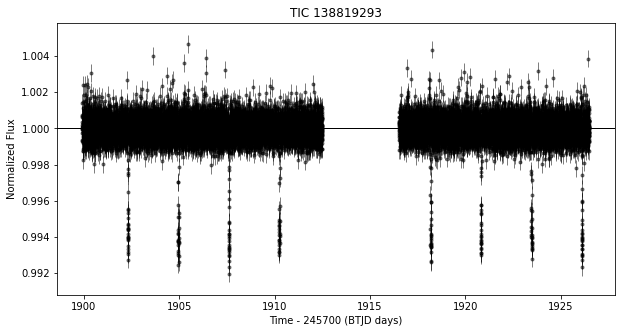

   Estimating period...


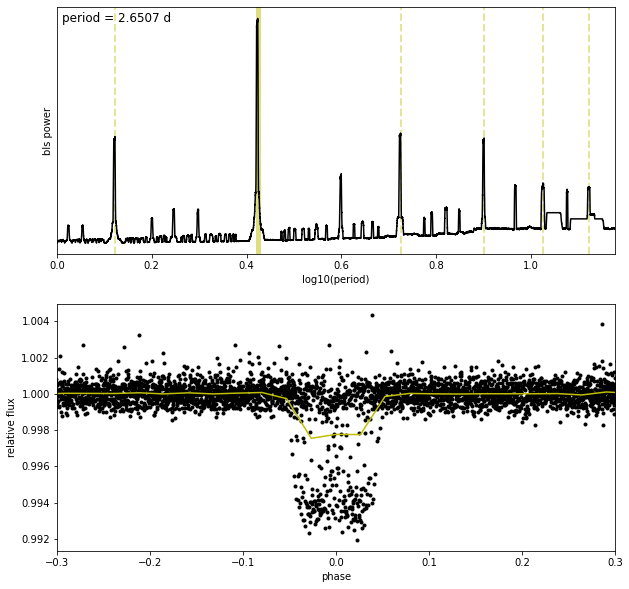

  0%|          | 6/3000 [00:00<00:57, 51.97it/s]

   Running MCMC...


100%|██████████| 3000/3000 [00:56<00:00, 52.71it/s]


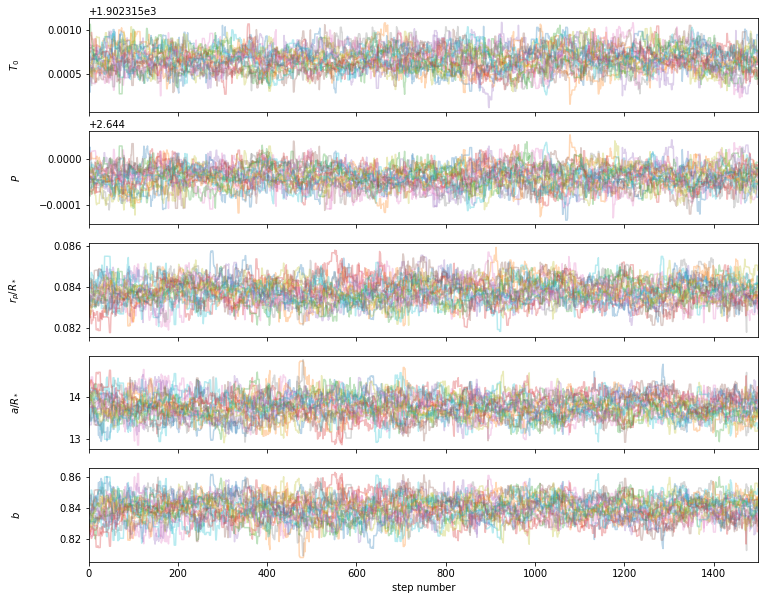

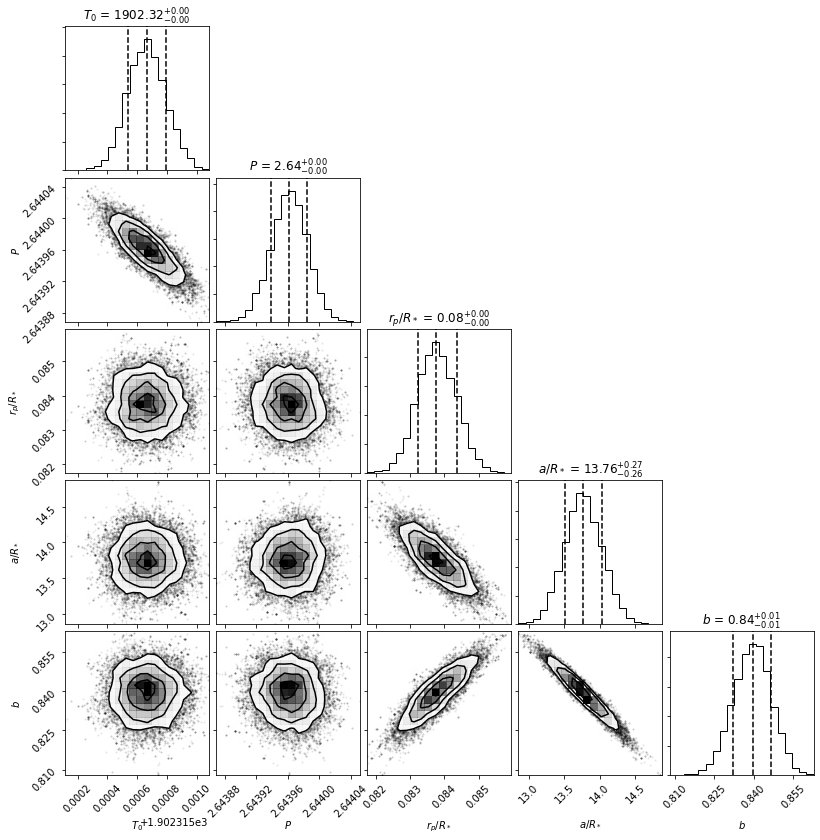

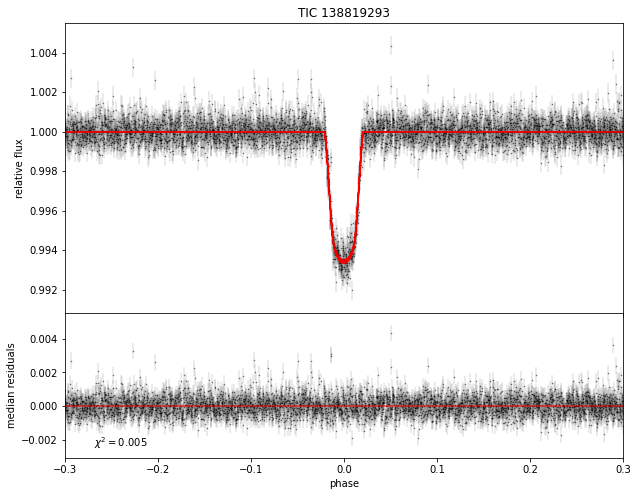

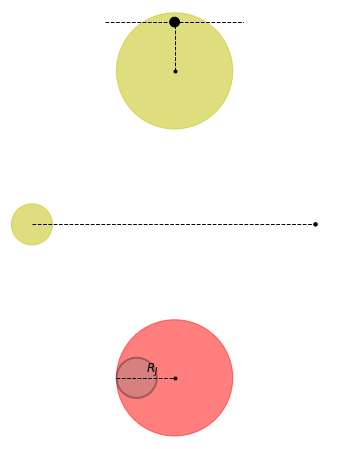

   tater done.


In [4]:
my_fit = transit_fitter.execute_fit()

In [5]:
my_fit

,median,lower,upper,(+),(-),units
$T_0$,1902.315664,1902.315537,1902.315793,0.000127,0.000129,d
$P$,2.643961,2.643938,2.643984,0.000023,0.000022,d
$r_p/R_*$,0.083769,0.083222,0.084353,0.000547,0.000584,-
$a/R_*$,13.758047,13.502257,14.032864,0.255790,0.274817,-
$b$,0.839594,0.832086,0.846520,0.007508,0.006926,-
$r_p$,3.887260,3.861880,3.914364,0.025380,0.027103,R_Earth
$r_p$,0.346799,0.344534,0.349217,0.002264,0.002418,R_Jup
$a$,0.027220,0.026714,0.027763,0.000506,0.000544,AU
